In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from xgboost import XGBClassifier
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('aution_updated.csv')

In [ ]:
df=df.drop(['Auction Date','Auction Details Document'], axis=1)

In [ ]:
df

,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month
0,72.000,75.600,72.000,9550,Apr-24
1,82.800,81.360,81.360,9850,Apr-24
2,136.800,31.680,31.680,9800,Apr-24
3,148.800,148.800,148.800,8580,May-24
4,158.400,158.400,158.400,8550,Jun-24
5,8.640,8.640,8.640,8490,Jun-24
6,4.464,4.464,4.464,6800,May-24
7,19.344,19.344,19.344,9000,May-24
8,11.160,11.160,11.160,8600,May-24
9,8.928,8.928,8.928,9000,May-24


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Delivery Month']= label_encoder.fit_transform(df['Delivery Month'])
df['Delivery Month'].unique()

array([ 1, 14, 10, 12,  5,  7,  4, 16,  2, 18,  8,  9,  0, 13, 11,  6,  3,
       15, 17])

In [ ]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)

In [ ]:
df

,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month
0,72.000,75.600,72.000,9550,1
1,82.800,81.360,81.360,9850,1
2,136.800,31.680,31.680,9800,1
3,148.800,148.800,148.800,8580,14
4,158.400,158.400,158.400,8550,10
5,8.640,8.640,8.640,8490,10
6,4.464,4.464,4.464,6800,14
7,19.344,19.344,19.344,9000,14
8,11.160,11.160,11.160,8600,14
9,8.928,8.928,8.928,9000,14


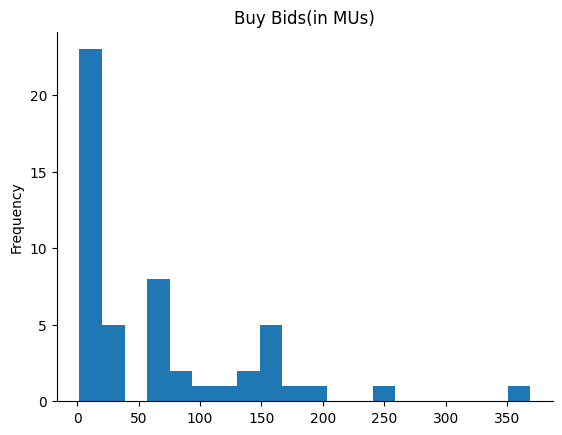

In [ ]:
# @title Buy Bids(in MUs)

from matplotlib import pyplot as plt
df['Buy Bids(in MUs)'].plot(kind='hist', bins=20, title='Buy Bids(in MUs)')
plt.gca().spines[['top', 'right',]].set_visible(False)

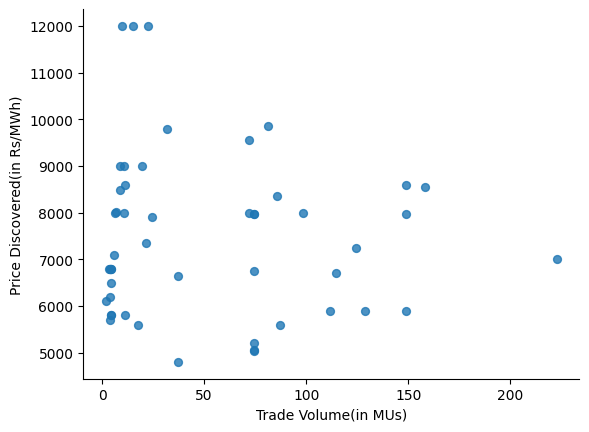

In [ ]:
# @title Trade Volume(in MUs) vs Price Discovered(in Rs/MWh)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Trade Volume(in MUs)', y='Price Discovered(in Rs/MWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

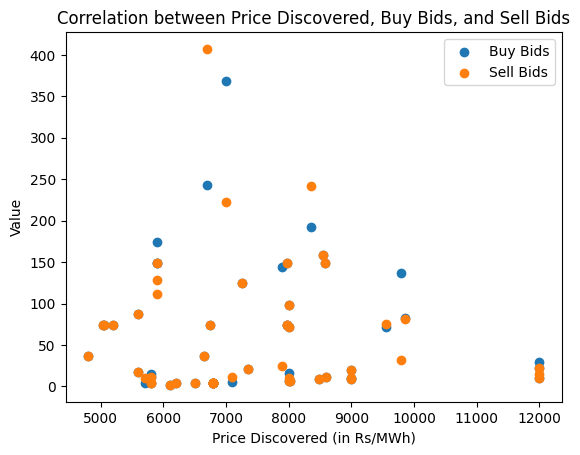

In [ ]:
# @title Correlation between Price Discovered, Buy Bids, and Sell Bids

import matplotlib.pyplot as plt
plt.scatter(df['Price Discovered(in Rs/MWh)'], df['Buy Bids(in MUs)'], label='Buy Bids')
plt.scatter(df['Price Discovered(in Rs/MWh)'], df['Sell Bids(in MUs)'], label='Sell Bids')
plt.xlabel('Price Discovered (in Rs/MWh)')
plt.ylabel('Value')
plt.title('Correlation between Price Discovered, Buy Bids, and Sell Bids')
_ = plt.legend()

<Axes: xlabel='Delivery Month'>

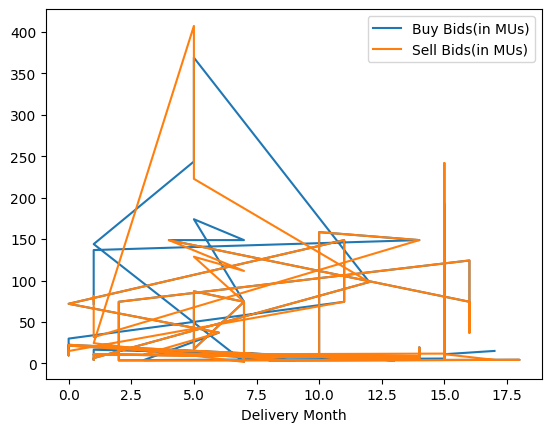

In [ ]:
# @title Buy and Sell Bids over Time

df.plot.line(x='Delivery Month', y=['Buy Bids(in MUs)', 'Sell Bids(in MUs)'])

In [ ]:
mean_value = df['Price Discovered(in Rs/MWh)'].mean()

print("Mean value of the column:", mean_value)

Mean value of the column: 7456.9607843137255


In [ ]:
total_avg_volume = df['Trade Volume(in MUs)'].mean()


In [ ]:
total_avg_volume = df['Trade Volume(in MUs)'].mean()

# Calculate the formula column
df['Threshold'] = (df['Price Discovered(in Rs/MWh)'].mean() * df['Trade Volume(in MUs)'].mean()).sum()/total_avg_volume

In [ ]:
df

,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month,Threshold
0,72.000,75.600,72.000,9550,1,7456.960784
1,82.800,81.360,81.360,9850,1,7456.960784
2,136.800,31.680,31.680,9800,1,7456.960784
3,148.800,148.800,148.800,8580,14,7456.960784
4,158.400,158.400,158.400,8550,10,7456.960784
5,8.640,8.640,8.640,8490,10,7456.960784
6,4.464,4.464,4.464,6800,14,7456.960784
7,19.344,19.344,19.344,9000,14,7456.960784
8,11.160,11.160,11.160,8600,14,7456.960784
9,8.928,8.928,8.928,9000,14,7456.960784


In [ ]:
df['Difference'] = df['Threshold'] - df['Price Discovered(in Rs/MWh)']

In [ ]:
df

,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month,Threshold,Difference
0,72.000,75.600,72.000,9550,1,7456.960784,-2093.039216
1,82.800,81.360,81.360,9850,1,7456.960784,-2393.039216
2,136.800,31.680,31.680,9800,1,7456.960784,-2343.039216
3,148.800,148.800,148.800,8580,14,7456.960784,-1123.039216
4,158.400,158.400,158.400,8550,10,7456.960784,-1093.039216
5,8.640,8.640,8.640,8490,10,7456.960784,-1033.039216
6,4.464,4.464,4.464,6800,14,7456.960784,656.960784
7,19.344,19.344,19.344,9000,14,7456.960784,-1543.039216
8,11.160,11.160,11.160,8600,14,7456.960784,-1143.039216
9,8.928,8.928,8.928,9000,14,7456.960784,-1543.039216


In [ ]:
# prompt: Using dataframe df: save this file in csv

df.to_csv('data.csv')


In [ ]:
df_final = pd.read_csv('data.csv')

In [ ]:
df_final

,Unnamed: 0,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month,Threshold,Difference
0,0,72.000,75.600,72.000,9550,1,7456.960784,-2093.039216
1,1,82.800,81.360,81.360,9850,1,7456.960784,-2393.039216
2,2,136.800,31.680,31.680,9800,1,7456.960784,-2343.039216
3,3,148.800,148.800,148.800,8580,14,7456.960784,-1123.039216
4,4,158.400,158.400,158.400,8550,10,7456.960784,-1093.039216
5,5,8.640,8.640,8.640,8490,10,7456.960784,-1033.039216
6,6,4.464,4.464,4.464,6800,14,7456.960784,656.960784
7,7,19.344,19.344,19.344,9000,14,7456.960784,-1543.039216
8,8,11.160,11.160,11.160,8600,14,7456.960784,-1143.039216
9,9,8.928,8.928,8.928,9000,14,7456.960784,-1543.039216


In [ ]:
df_final=df_final.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_final

,Buy Bids(in MUs),Sell Bids(in MUs),Trade Volume(in MUs),Price Discovered(in Rs/MWh),Delivery Month,Threshold,Difference
0,72.000,75.600,72.000,9550,1,7456.960784,-2093.039216
1,82.800,81.360,81.360,9850,1,7456.960784,-2393.039216
2,136.800,31.680,31.680,9800,1,7456.960784,-2343.039216
3,148.800,148.800,148.800,8580,14,7456.960784,-1123.039216
4,158.400,158.400,158.400,8550,10,7456.960784,-1093.039216
5,8.640,8.640,8.640,8490,10,7456.960784,-1033.039216
6,4.464,4.464,4.464,6800,14,7456.960784,656.960784
7,19.344,19.344,19.344,9000,14,7456.960784,-1543.039216
8,11.160,11.160,11.160,8600,14,7456.960784,-1143.039216
9,8.928,8.928,8.928,9000,14,7456.960784,-1543.039216


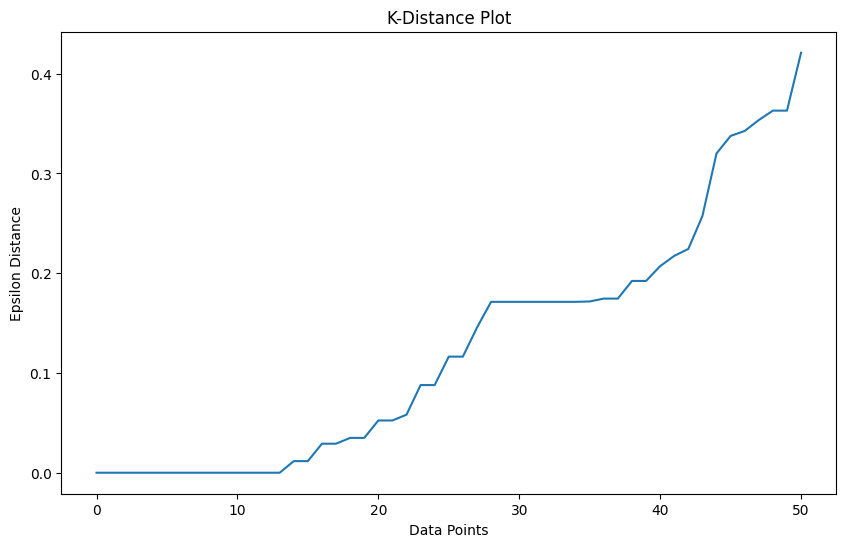

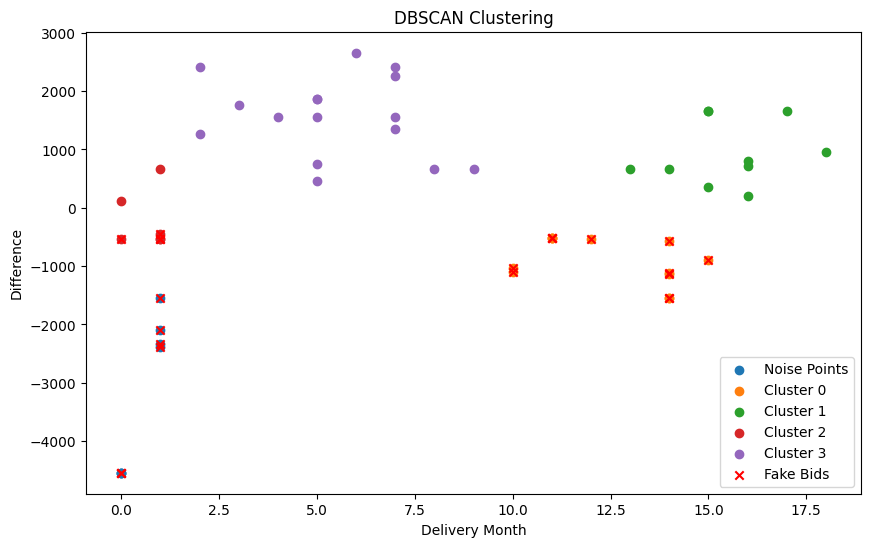

In [ ]:

# Assuming df_final is your DataFrame containing the data
X = df_final[['Difference', 'Delivery Month']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal epsilon value using the k-distance plot
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon Distance')
plt.title('K-Distance Plot')
plt.show()

# Based on the plot, determine the optimal epsilon value
epsilon = 0.55  # You can change this based on the plot
min_samples = 5  # Adjust min_samples as needed

# Perform DBSCAN clustering with adjusted parameters
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X_scaled)

# Check if at least two unique labels are generated
unique_labels = np.unique(dbscan.labels_)
if len(unique_labels) < 2:
    print("DBSCAN did not generate enough labels. Adjust parameters or preprocess data.")
else:
    # Add cluster labels to the DataFrame
    df_final['DBSCAN_Cluster'] = dbscan.labels_

    # Separate positive and negative data points
    positive_data = df_final[df_final['Difference'] >= 0]
    negative_data = df_final[df_final['Difference'] < 0]

    # Visualize the clusters with highlighted negative points
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(dbscan.labels_):
        if cluster == -1:
            cluster_data = df_final[df_final['DBSCAN_Cluster'] == cluster]
            plt.scatter(cluster_data['Delivery Month'], cluster_data['Difference'], label=f'Noise Points')
        else:
            cluster_data = df_final[df_final['DBSCAN_Cluster'] == cluster]
            plt.scatter(cluster_data['Delivery Month'], cluster_data['Difference'], label=f'Cluster {cluster}')

    # Highlight negative data points separately
    plt.scatter(negative_data['Delivery Month'], negative_data['Difference'], marker='x', color='red', label='Fake Bids')

    plt.xlabel('Delivery Month')
    plt.ylabel('Difference')
    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()

In [ ]:

# Check if at least two unique labels are generated
unique_labels = np.unique(dbscan.labels_)
if len(unique_labels) < 2:
    print("DBSCAN did not generate enough labels. Adjust parameters or preprocess data.")
else:
    # Evaluate silhouette score
    silhouette = silhouette_score(X_scaled, dbscan.labels_)
    print(f"Silhouette Score: {silhouette}")

    # Evaluate Calinski-Harabasz index (CH index)
    ch_index = calinski_harabasz_score(X_scaled, dbscan.labels_)
    print(f"Calinski-Harabasz Index: {ch_index}")

    # Evaluate Davies-Bouldin index (DB index)
    db_index = davies_bouldin_score(X_scaled, dbscan.labels_)
    print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.5360566328346643
Calinski-Harabasz Index: 91.33692445051881
Davies-Bouldin Index: 0.5730023573565418


In [ ]:

# Assuming df_final is your DataFrame containing the data
# Convert 'Difference' to a binary categorical variable
df_final['Difference_Category'] = pd.cut(df_final['Difference'], bins=[-float("inf"), 0, float("inf")], labels=['Fake', 'Real'])

# Define features (X) and target variable (y)
X = df_final.drop(['Difference', 'Difference_Category'], axis=1)  # Features
y = df_final['Difference_Category']  # Target variable

# Encode the target variable into numerical classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Inverse transform the predicted labels to get original class labels
y_pred_orig = label_encoder.inverse_transform(y_pred)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)  # Assuming 'Real' is encoded as 1
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # Assuming 'Real' is encoded as 1

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Precision: 1.0000
Recall: 1.0000


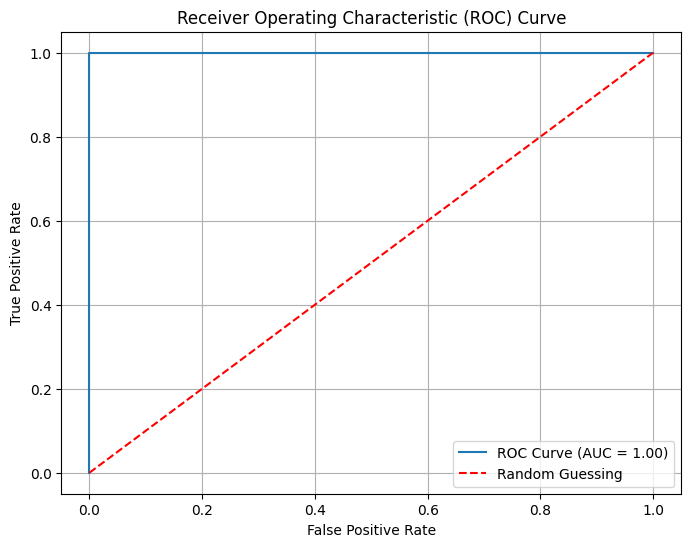

<Figure size 800x600 with 0 Axes>

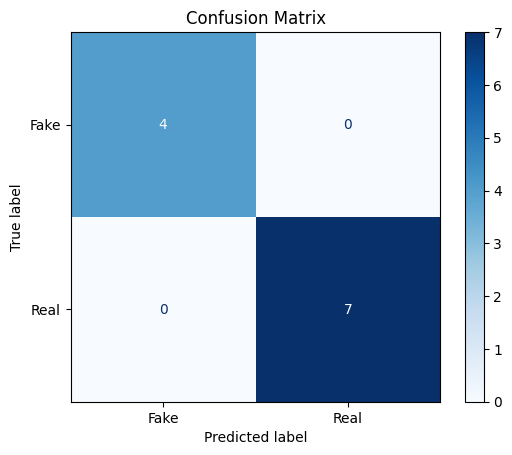

In [ ]:

# Calculate ROC curve and ROC-AUC score
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
